**Project: Analysing Pixar Movie Performance**

This project is meant to explore different data visualization techniques. The dataset contains information about the financial performance and critical receptions of different Pixar films.

**Part 1: Data Import**

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pixar_movies = pd.read_csv('data/PixarMovies.csv')
pixar_movies

,Year Released,Movie,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Domestic %,International %,Production Budget,Oscars Nominated,Oscars Won
0,1995,Toy Story,81,100,8.3,92,29.14,362.0,191.8,356.21,170.2,52.98%,47.02%,30,3.0,0.0
1,1998,A Bug's Life,96,92,7.2,77,33.26,363.4,162.8,277.18,200.6,44.80%,55.20%,45,1.0,0.0
2,1999,Toy Story 2,92,100,7.9,88,57.39,485.0,245.9,388.43,239.2,50.70%,49.32%,90,1.0,0.0
3,2001,"Monsters, Inc.",90,96,8.1,78,62.58,528.8,255.9,366.12,272.9,48.39%,51.61%,115,3.0,1.0
4,2003,Finding Nemo,104,99,8.2,90,70.25,895.6,339.7,457.46,555.9,37.93%,62.07%,94,4.0,1.0
5,2004,The Incredibles,115,97,8.0,90,70.47,631.4,261.4,341.28,370.0,41.40%,58.60%,92,4.0,2.0
6,2006,Cars,116,74,7.2,73,60.12,462.0,244.1,302.59,217.9,52.84%,47.16%,70,2.0,0.0
7,2007,Ratatouille,111,96,8.0,96,47.00,623.7,206.4,243.65,417.3,33.09%,66.91%,150,5.0,1.0
8,2008,WALL-E,97,96,8.4,94,63.10,521.3,223.8,253.11,297.5,42.93%,57.07%,180,6.0,1.0
9,2009,Up,96,98,8.3,88,68.11,731.3,293.0,318.90,438.3,40.07%,59.93%,175,5.0,2.0


**Part 2: Basic Data Exploration**

In [65]:
print('DATASET SHAPE')
print('The dataset has {0} rows and {1} columns'.format(pixar_movies.shape[0], pixar_movies.shape[1]))
print('\n')
print('COLUMN DATA TYPES')
print(pixar_movies.dtypes)
print('\n')
print('SUMMARY STATISTICS')
selections = ['Length', 'Metacritic Score', 'Opening Weekend', 'Worldwide Gross', 'Domestic Gross']
subset = pixar_movies[selections].loc[0:len(pixar_movies.index)-2]
print(subset.describe(percentiles=[]))

DATASET SHAPE
The dataset has 15 rows and 16 columns


COLUMN DATA TYPES
Year Released                int64
Movie                       object
Length                       int64
RT Score                     int64
IMDB Score                 float64
Metacritic Score             int64
Opening Weekend            float64
Worldwide Gross            float64
Domestic Gross             float64
Adjusted Domestic Gross    float64
International Gross        float64
Domestic %                  object
International %             object
Production Budget            int64
Oscars Nominated           float64
Oscars Won                 float64
dtype: object


SUMMARY STATISTICS
           Length  Metacritic Score  Opening Weekend  Worldwide Gross  \
count   14.000000         14.000000        14.000000        14.000000   
mean   101.500000         82.071429        66.390000       607.871429   
std     10.301232         12.231512        23.276196       196.499984   
min     81.000000         57.000000     

**Part 3: Data Cleaning**

In [66]:
new_domestic_per = pixar_movies['Domestic %'].str.rstrip('%').astype(float)
new_internat_per = pixar_movies['International %'].str.rstrip('%').astype(float)

pixar_movies['Domestic %'] = new_domestic_per
pixar_movies['International %'] = new_internat_per
pixar_movies['IMDB Score'] = pixar_movies['IMDB Score'] * 10

filtered_pixar = pixar_movies.loc[0:len(pixar_movies.index)-2]

filtered_pixar.set_index(keys='Movie', inplace=True)
pixar_movies.set_index(keys='Movie', inplace=True)

**Part 4: Data Visualization, Line Plots**

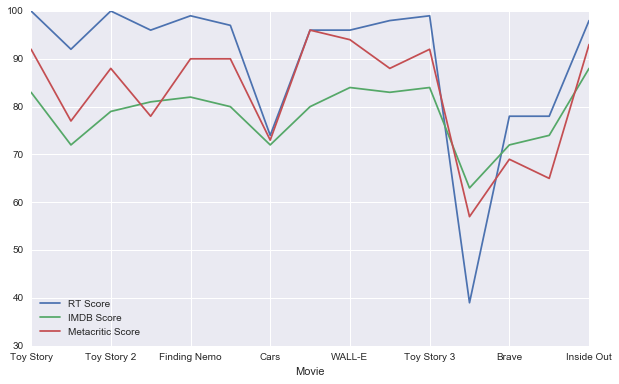

In [69]:
critics_reviews = pixar_movies[['RT Score', 'IMDB Score', 'Metacritic Score']]
critics_reviews.plot(figsize=(10,6))
plt.show()

**Part 5: Data Visualization, Box Plot**

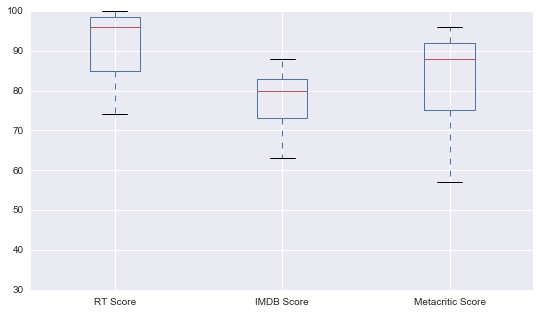

In [70]:
critics_reviews.plot(kind='box', figsize=(9,5))
plt.show()

**Part 6: Data Visualization, Stacked Bar Plot**

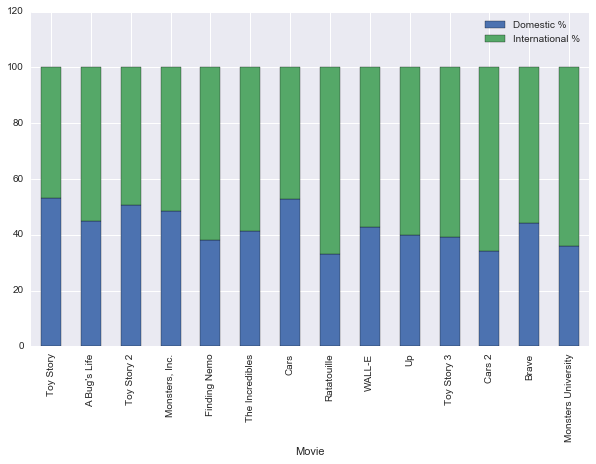

In [72]:
revenue_proportions = filtered_pixar[['Domestic %', 'International %']]
revenue_proportions.plot(kind='bar', stacked=True, figsize=(10,6))
plt.show()

**Additional Suggestions:**
1. Create grouped bar plot to see if there's a correlation between number of Oscar nominations and number of wins
2. What correlates with Adjusted Domestic Gross?

**Additional Question 1:** Is there a relationship between the number of Oscar nominations and the number of wins? (use grouped bar plot)

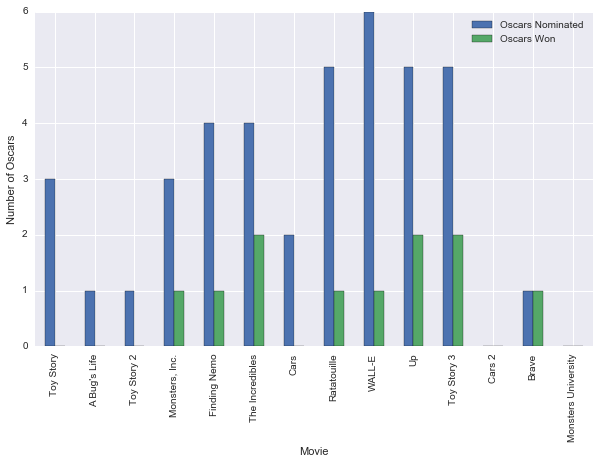

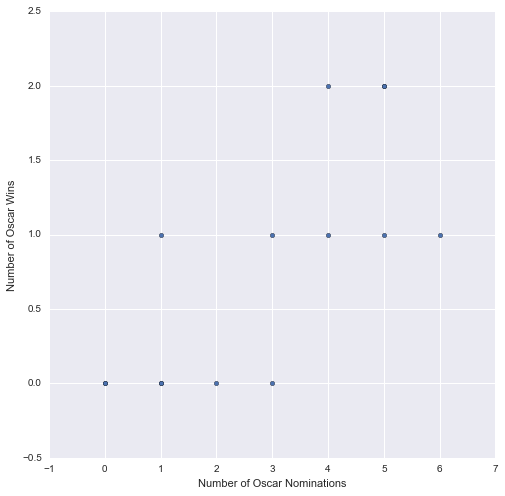

In [80]:
filtered_pixar.plot(y=['Oscars Nominated', 'Oscars Won'], kind='bar', figsize=(10,6))
sns.plt.ylabel('Number of Oscars')
plt.show()

filtered_pixar.plot(x='Oscars Nominated',y='Oscars Won', kind='scatter', figsize=(8,8))
sns.plt.xlabel('Number of Oscar Nominations')
sns.plt.ylabel('Number of Oscar Wins')
plt.show()

**Answer 1:** The grouped bar plot is not the best figure for this (hence the scatterplot), but in general, there appears to be somewhat of a relationship between number of Oscar nominations and wins.

**Question 2:** What columns correlate with Adjusted Domestic Gross?

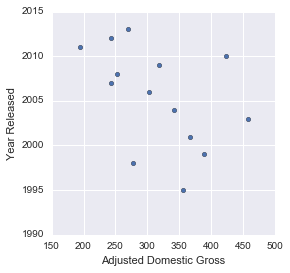

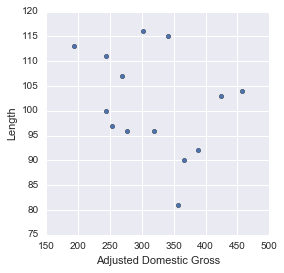

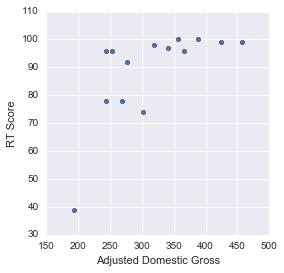

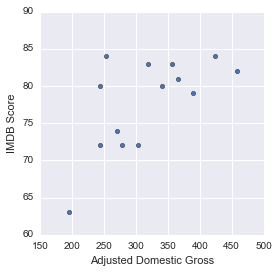

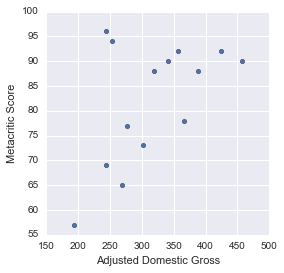

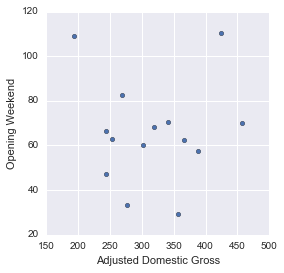

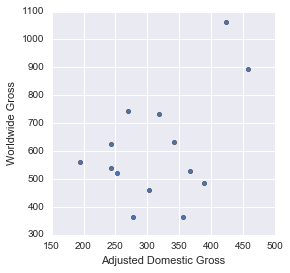

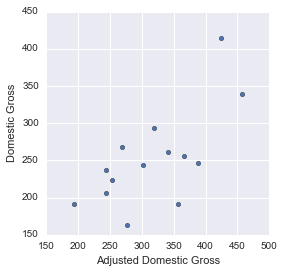

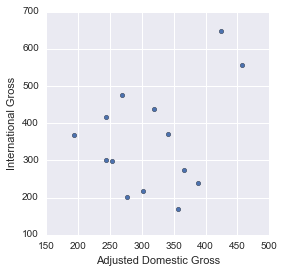

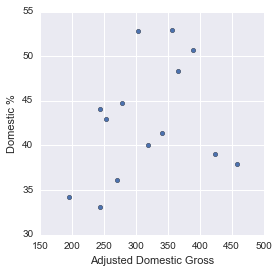

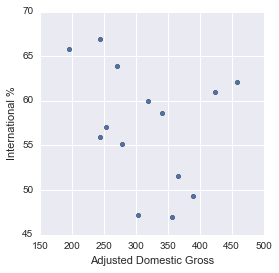

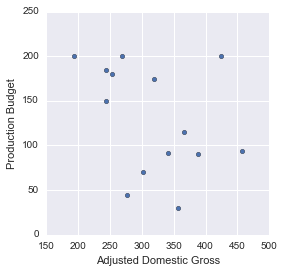

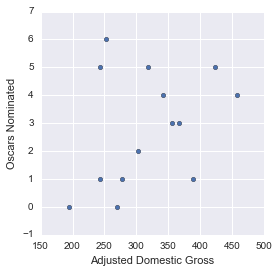

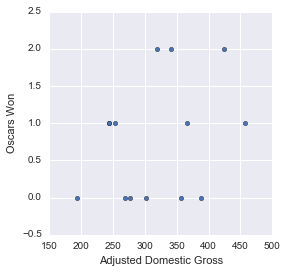

In [91]:
for column in filtered_pixar:
    if column != 'Adjusted Domestic Gross':
        filtered_pixar.plot(x='Adjusted Domestic Gross',y=column, kind='scatter', figsize=(4,4))
        plt.show()

**Answer 2:** The primary columns that correlate with Adjusted Domestic Gross are critic scores. There's also a correlation with Domestic Gross, but that is to be expected and it's not that interesting.